# 8.1 Simulated Annealing (5 points)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Initialization

# Parameters
bs = [0.05, 0.02]
l = 1.1
tmax = 50
M = 1 # try also 500
N = 6

# random parameters
s = np.random.choice([-1,1],N)
W = np.random.rand(6,6)
for i in range(0,N):
    W[i,i] = 0
    
# Make W symmetric
W = (W + W.T)/2

# function

In [3]:
beta = np.zeros(tmax)
energy = np.zeros(tmax)
probabilities = {}

In [4]:
for orig_b in bs:
    b = orig_b
    for t in range(0,tmax):
        for m in range(0,M):
            # select random node
            i = np.random.choice(N,1)
            e = 0
            for j in range(0,N):
                if j!=i:
                    e = e + W[i,j]*s[i]*s[j]
            e = -0.5*e
            delta_e = -2*e
            if 1/(1+np.exp(b*delta_e) > 0.5):
                s[i] = s[i]*-1
            energy[t] = e
        beta[t] = b
        b = l*b
    probabilities[orig_b] = np.exp(-b * energy[tmax-1])

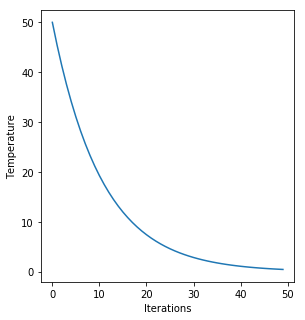

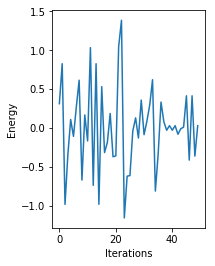

In [5]:
# Plot Temperature and Energy over time

T = 1./beta

plt.figure(figsize=(10,5))

plt.subplot(121)
plt.plot(T, label="Temperature")
plt.ylabel("Temperature")
plt.xlabel("Iterations")
plt.show()

plt.subplot(122)
plt.plot(energy, label="Energy")
plt.ylabel("Energy")
plt.xlabel("Iterations")
plt.show()

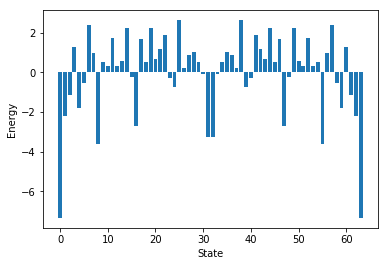

In [6]:
# Plot Energy for all State Combinations

state_energies = []

def state_combinations(n):
    if n == 1:
        return [[-1], [1]]
    else:
        res = []
        for sc in state_combinations(n-1):
            res.append(sc + [-1])
            res.append(sc + [1])
        return res

Zs = {b: 0 for b in bs}
for sc in state_combinations(6):
    sc = np.array(sc)
    sc_i = sc[:, np.newaxis]
    sc_j = sc[np.newaxis, :]
    energy = np.sum(-0.5 * sc_i * sc_j * W)
    
    state_energies.append(energy)
    
    for b in bs:
        Zs[b] += np.exp(-b*energy)

plt.bar(np.arange(len(state_energies)), state_energies)
plt.ylabel("Energy")
plt.xlabel("State")
plt.show()

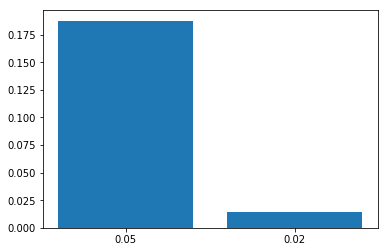

In [7]:
# Plot probabilities for different b's

for b in bs:
    probabilities[b] = probabilities[b] / Zs[b]

plt.figure()
plt.bar(range(len(probabilities)), probabilities.values(), align='center')
plt.xticks(range(len(probabilities)), probabilities.keys())

plt.show()

In [8]:
probabilities

{0.02: 0.014566719021744782, 0.05: 0.18756455724548088}